In [1]:
import tensorflow as tf
import os #navigate file structures
import numpy as np
import cv2
import random 
import matplotlib.pyplot as plt
import pickle    # to save data
import imghdr
import shutil

In [55]:
os.listdir("D:\\machine learning\\dogs-vs-cats") #list all  files inside this folder

['cat', 'dog', 'test', 'train']

In [2]:
TRAIN_DATA_DIR = "D:\\machine learning\\dogs-vs-cats\\train"
TEST_DATA_DIR = "D:\\machine learning\\dogs-vs-cats\\test"
# Source path 

  
# Destination path 
CAT_TRAIN_DATA_DIR = 'D:\\machine learning\\dogs-vs-cats\\cat'
DOG_TRAIN_DATA_DIR = 'D:\\machine learning\\dogs-vs-cats\\dog'





In [58]:

os.listdir(TEST_DATA_DIR)# LIST ALL IMAGES OF CAT AND DOGS INSIDE TEST FOLDER

['1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '1002.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '1003.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10036.jpg',
 '10037.jpg',
 '10038.jpg',
 '10039.jpg',
 '1004.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '1005.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10055.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '1006.jpg',
 '10060.jpg',
 '10061.jpg',
 '10062.

# split train data into cat train folder and dog train folder

In [51]:
for image in os.listdir(TRAIN_DATA_DIR):  # get all images of cat and dog in train folder
    x=image.split('.')[0]         # split cat.100.jpg  to get first item in string which is cat 
    if x == "dog":
        #move dog images to DOG_TRAIN_DATA_DIR
        dest = shutil.move("D:\\machine learning\\dogs-vs-cats\\train\\"+image, DOG_TRAIN_DATA_DIR)
    else:
        #move cat images to CAT_TRAIN_DATA_DIR
        dest = shutil.move("D:\\machine learning\\dogs-vs-cats\\train\\"+image, CAT_TRAIN_DATA_DIR)
        

In [59]:
os.listdir(CAT_TRAIN_DATA_DIR)# LIST ALL IMAGES OF CAT INSIDE CAT FOLDER

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
#limit tensorflow not to use all ram in gpu when we load data
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:  #for loop for all gpu that you have
    tf.config.experimental.set_memory_growth(gpu, True) #this telling tensorflow not to all of our memory keep it low

In [72]:

img=cv2.imread(os.path.join(CAT_TRAIN_DATA_DIR,'cat.10892.jpg'))   
img

array([[[110, 110, 116],
        [109, 109, 115],
        [109, 109, 115],
        ...,
        [ 31,  16,  14],
        [ 31,  16,  14],
        [ 31,  16,  14]],

       [[110, 110, 116],
        [110, 110, 116],
        [109, 109, 115],
        ...,
        [ 31,  16,  14],
        [ 31,  16,  14],
        [ 31,  16,  14]],

       [[111, 111, 117],
        [110, 110, 116],
        [110, 110, 116],
        ...,
        [ 31,  16,  14],
        [ 31,  16,  14],
        [ 31,  16,  14]],

       ...,

       [[165, 167, 202],
        [169, 171, 206],
        [173, 175, 210],
        ...,
        [ 49,  44,  41],
        [ 47,  42,  39],
        [ 46,  41,  38]],

       [[166, 168, 203],
        [169, 171, 206],
        [174, 176, 211],
        ...,
        [ 51,  46,  43],
        [ 50,  45,  42],
        [ 48,  43,  40]],

       [[167, 169, 204],
        [170, 172, 207],
        [174, 176, 211],
        ...,
        [ 48,  43,  40],
        [ 47,  42,  39],
        [ 46,  41,  38]]

In [73]:
img.shape   

(374, 500, 3)

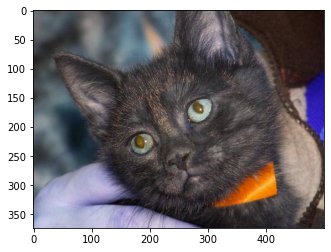

In [74]:
plt.imshow(img) 

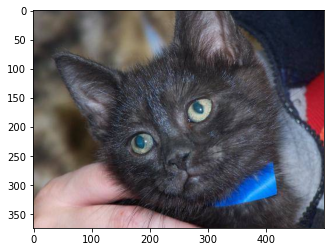

In [75]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show() # to remove address word line

# load cat and dog train data from a directory

In [4]:
data = tf.keras.utils.image_dataset_from_directory("D:\\machine learning\\dogs-vs-cats\\train")    

Found 25000 files belonging to 2 classes.


In [5]:
# access the generator from our data pipeline  allowing to loop throw data
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()   # get consecutive batches using the dot next method (grabbing one batch back)
len(batch)  # there are two parts of dataset (1-images 2- labels) 
#if we write batch[0] it returns all numby array of images

2

In [7]:
batch[0].shape     #32 images size (256,256,3)

(32, 256, 256, 3)

In [8]:
batch[1]   #so 1 represent either cat or dog 

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

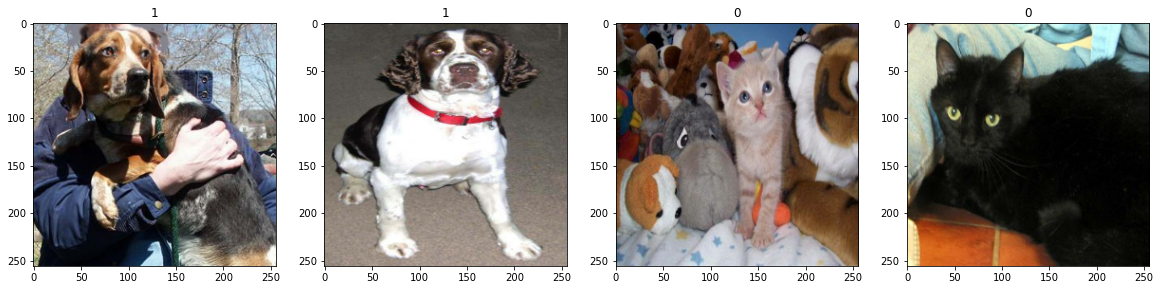

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):       # show 0 for cats ----1 for dogs
    ax[idx].imshow(img.astype(np.uint8))
    ax[idx].title.set_text(batch[1][idx])

# scale data 

In [10]:
#scale data 
batch[0].max()

255.0

In [11]:
batch[0].min()

0.0

In [12]:
data = data.map(lambda x,y: (x/255, y))   #x represent our images  y our labels

In [13]:
data.as_numpy_iterator().next()[0].max()

1.0

# split our training data into training and validation

In [14]:
#split our data 
len(data)  #data has 782 batches each batch has 32 images so total images = 782*32=24500 total data

782

In [15]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)+1

In [16]:
val_size

157

In [17]:
train_size

625

In [18]:
train = data.take(train_size)  #take 625 batches to train
val = data.skip(train_size).take(val_size)   #skip train batches and take 157 batch to validation

In [19]:
len(val)

157

# creating our model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [21]:
model=Sequential() #creating model

In [22]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('rmsprop', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

In [25]:
logdir="D:\\machine learning\\tensorflow\\logs"

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)   
# here we want to log out all of all the information of our model to tensorboard_callback so we could open it up inside
#tensorboard_callback in mode.fit add callbacks=[tensorboard_callback]

In [27]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
625/625 [==============================] - 1741s 3s/step - loss: 0.6603 - accuracy: 0.6711 - val_loss: 0.5716 - val_accuracy: 0.7068
Epoch 2/10
625/625 [==============================] - 1732s 3s/step - loss: 0.4652 - accuracy: 0.7799 - val_loss: 0.4583 - val_accuracy: 0.7882
Epoch 3/10
625/625 [==============================] - 1790s 3s/step - loss: 0.3664 - accuracy: 0.8364 - val_loss: 0.5210 - val_accuracy: 0.7488
Epoch 4/10
625/625 [==============================] - 1746s 3s/step - loss: 0.2787 - accuracy: 0.8868 - val_loss: 0.4780 - val_accuracy: 0.8034
Epoch 5/10
625/625 [==============================] - 1781s 3s/step - loss: 0.1888 - accuracy: 0.9247 - val_loss: 0.6028 - val_accuracy: 0.7886
Epoch 6/10
625/625 [==============================] - 1747s 3s/step - loss: 0.1280 - accuracy: 0.9525 - val_loss: 0.4954 - val_accuracy: 0.8016
Epoch 7/10
625/625 [==============================] - 1773s 3s/step - loss: 0.0964 - accuracy: 0.9641 - val_loss: 0.4892 - val_accuracy:

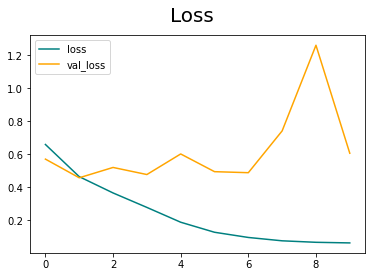

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

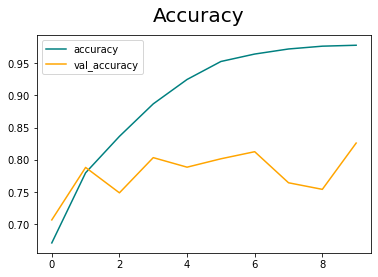

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# test model

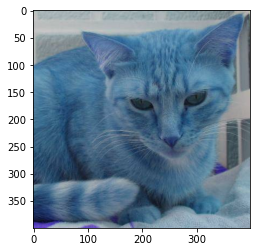

In [32]:
img1=cv2.imread(os.path.join("D:\\machine learning\\dogs-vs-cats",'test','45.jpg'))
plt.imshow(img1)
plt.show()

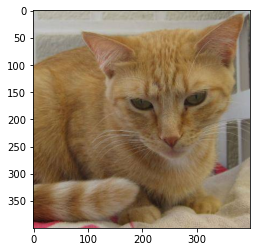

In [33]:
x=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(x)
plt.show()

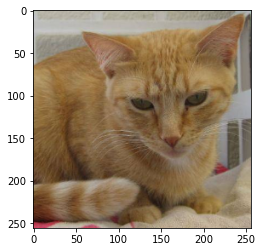

In [34]:
resize1 = tf.image.resize(x, (256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [35]:
yhat = model.predict(np.expand_dims(resize1/255, 0))
if yhat > 0.5: 
    print("it is a dog")
else:
    print("it is a cat")

1/1 [==============================] - 1s 694ms/step
it is a cat


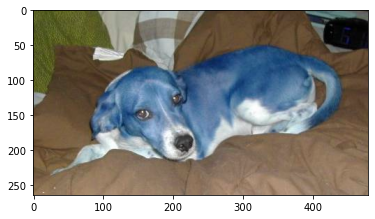

In [36]:
img2=cv2.imread(os.path.join("D:\\machine learning\\dogs-vs-cats",'test','26.jpg'))
plt.imshow(img2)
plt.show()

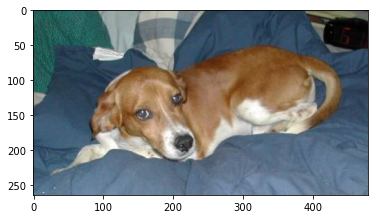

In [37]:
y=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(y)
plt.show()

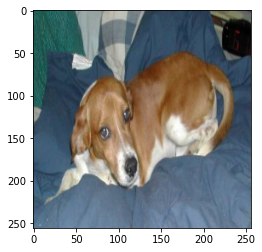

In [38]:
resize2 = tf.image.resize(y, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [39]:
xhat = model.predict(np.expand_dims(resize2/255, 0))
if xhat > 0.5: 
    print("it is a dog")
else:
    print("it is a cat")

1/1 [==============================] - 0s 67ms/step
it is a dog
